In [60]:
# !pip install yfinance tensorflow

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [62]:
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
symbol = '^NSEI'
nifty_50_data = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [63]:
nifty_50_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-23,25872.550781,25956.000000,25847.349609,25939.050781,25939.050781,209200
2024-09-24,25921.449219,26011.550781,25886.849609,25940.400391,25940.400391,384100
2024-09-25,25899.449219,26032.800781,25871.349609,26004.150391,26004.150391,278500
2024-09-26,26005.400391,26250.900391,25998.400391,26216.050781,26216.050781,370900
2024-09-27,26248.250000,26277.349609,26151.400391,26178.949219,26178.949219,490300


In [64]:
nifty_50_data.shape

(4175, 6)

In [65]:
nifty_50_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4.175000e+03
mean,9902.338850,9956.047761,9833.233202,9896.418086,9896.418086,2.040126e+05
std,5307.351504,5320.706726,5286.267728,5305.401058,5305.401058,2.094917e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5568.425049,5608.649902,5523.025146,5565.449951,5565.449951,0.000000e+00
50%,8399.400391,8445.150391,8340.950195,8382.299805,8382.299805,1.759000e+05
75%,11930.525391,11974.100098,11854.524902,11915.575195,11915.575195,2.846500e+05
max,26248.250000,26277.349609,26151.400391,26216.050781,26216.050781,1.811000e+06


In [66]:
nifty_50_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4175 entries, 2007-09-17 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4175 non-null   float64
 1   High       4175 non-null   float64
 2   Low        4175 non-null   float64
 3   Close      4175 non-null   float64
 4   Adj Close  4175 non-null   float64
 5   Volume     4175 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 228.3 KB


In [67]:
def plot_graph(column_name):
  nifty_50_data[column_name].plot(figsize=(10,5))
  plt.xlabel('Date')
  plt.ylabel(column_name)
  plt.title('{0} of Nifty 50'.format(column_name))
  plt.show()

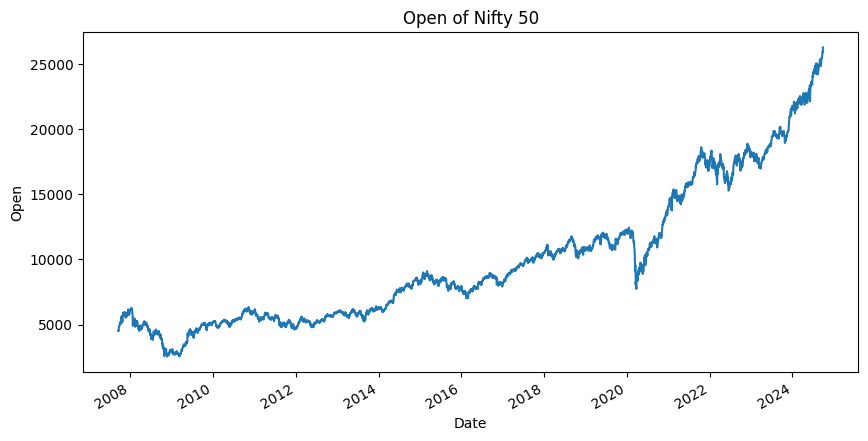

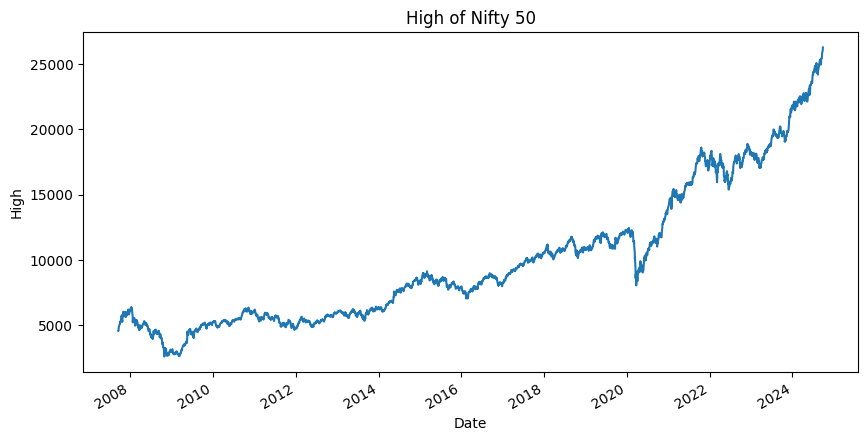

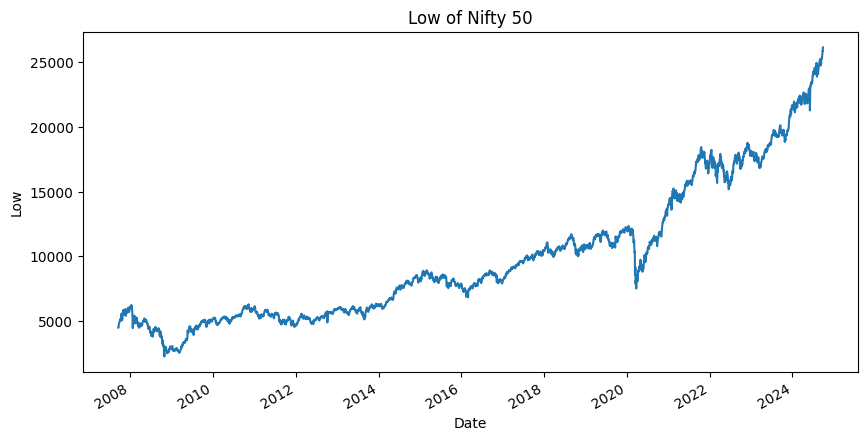

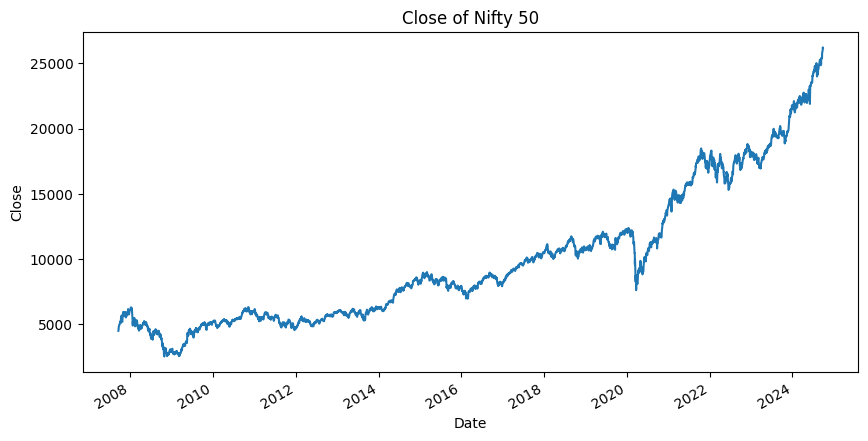

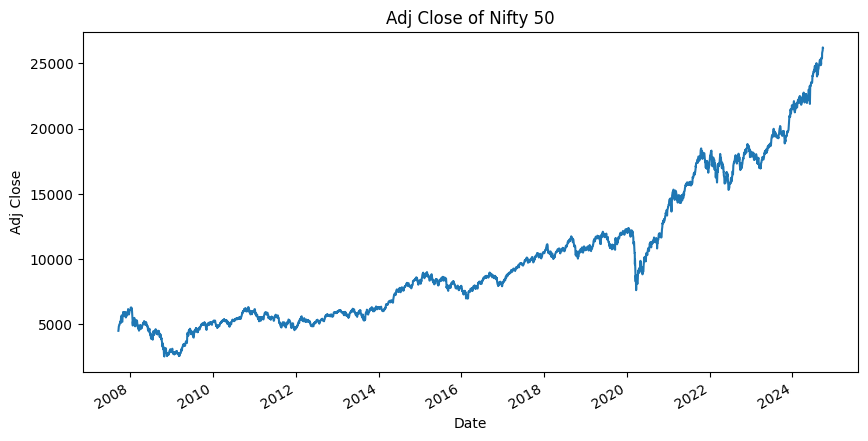

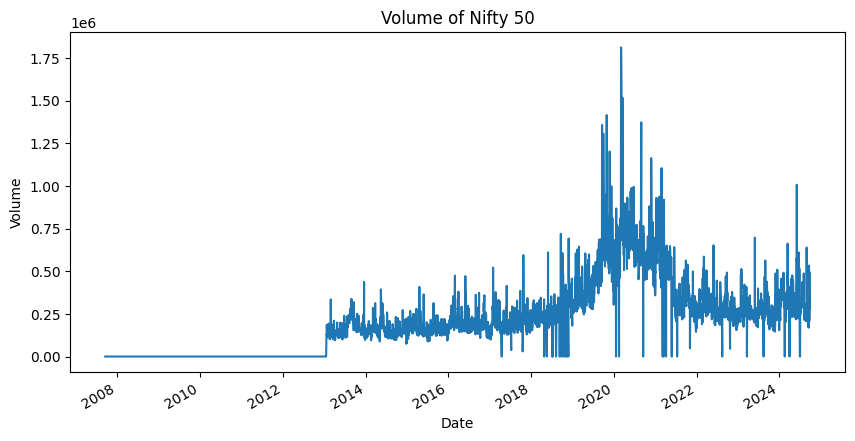

In [68]:
# for column in nifty_50_data.columns:
#   plot_graph(column)
for col in nifty_50_data.columns:
  plot_graph(col)

# COVID AND ITS EFFECTS ON NIFTY 50

In [69]:
bear_df = nifty_50_data[(nifty_50_data.index>'2020-01-01') & (nifty_50_data.index<'2021-01-01')]
bear_df = bear_df.iloc[bear_df['Adj Close'].argmin()-20:bear_df['Adj Close'].argmin()+20,:]
bear_df.shape

(40, 6)

Text(0.5, 1.0, 'VOLUME TRADED OF NIFTY 50')

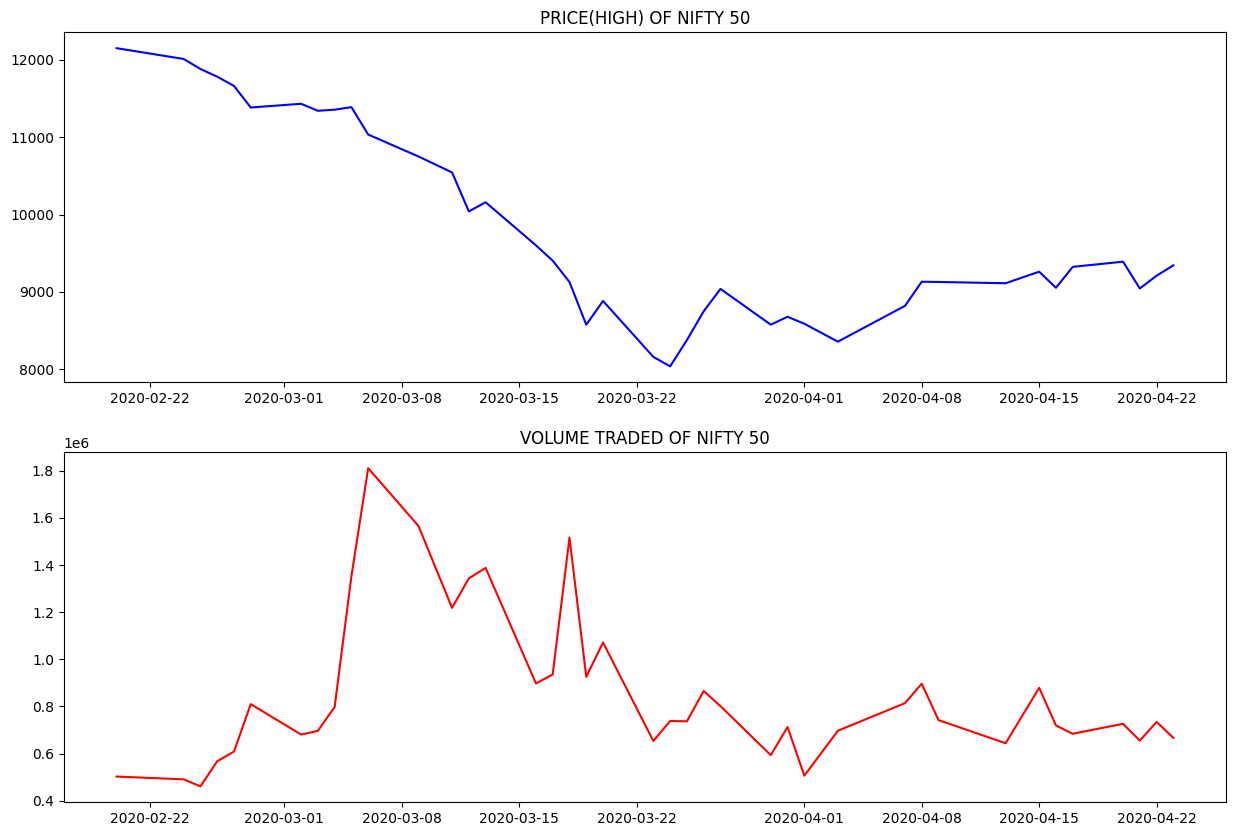

In [70]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax = ax.flatten()
ax[0].plot(bear_df['High'],color='b',label='High')
ax[1].plot(bear_df['Volume'],color='r',label='Volume')
ax[0].set_title('PRICE(HIGH) OF NIFTY 50')
ax[1].set_title('VOLUME TRADED OF NIFTY 50')

# Moving Average

In [71]:
# calculate MA
def moving_average(i):
  a=[]
  a.append(nifty_50_data['Adj Close'].rolling(window=i).mean())
  return a
def plot_ma(i):
  fig,ax = plt.subplots(figsize=(10,5))
  ax.plot(nifty_50_data['Adj Close'][i:],label='ADJ HIGH',color='r')
  ax.plot(moving_average(i)[0],label='MA {0}'.format(i),color='b')

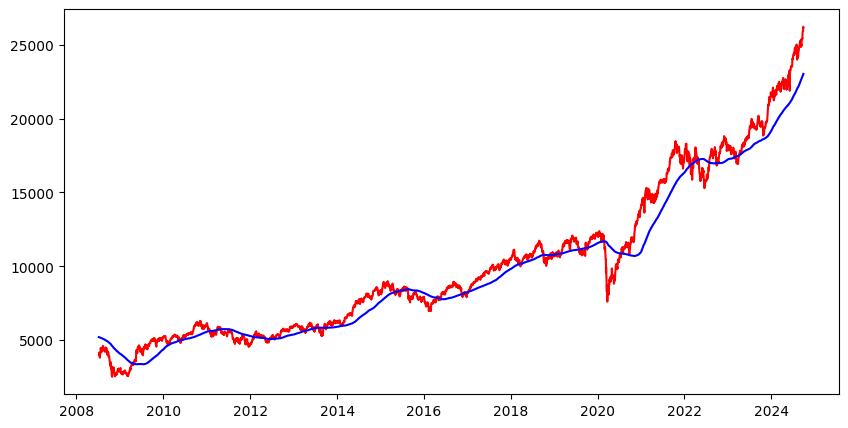

In [72]:
plot_ma(200)

Text(0.5, 1.0, 'Percentage Change in Adj Close')

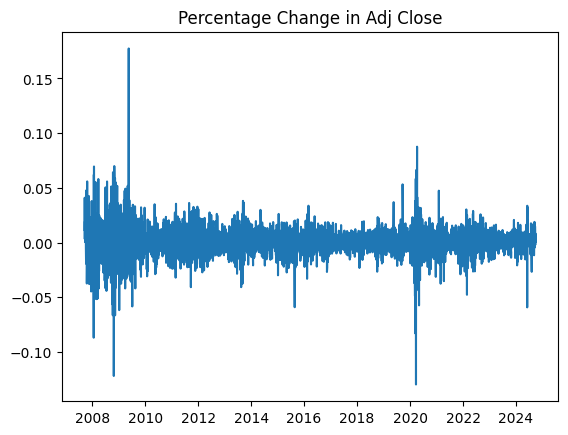

In [73]:
nifty_50_data['percentage-change'] = nifty_50_data['Adj Close'].pct_change()
plt.plot(nifty_50_data['percentage-change'])
plt.title('Percentage Change in Adj Close')

# Preprocessing Data

In [74]:
adj_close = nifty_50_data[['Adj Close']]
max(adj_close.values),min(adj_close.values)

(array([26216.05078125]), array([2524.19995117]))

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.08316995],
       [0.08534581],
       [0.09320294],
       ...,
       [0.99105598],
       [1.        ],
       [0.99843399]])

In [76]:
len(scaled_data)

4175

In [77]:
x = []
y = []
for i in range(100,len(scaled_data)):
  x.append(scaled_data[i-100:i])
  y.append(scaled_data[i])
x,y=np.array(x),np.array(y)

# Training Testing Split

In [78]:
split_index = int(len(scaled_data)*0.9)
# Train
x_train = x[:split_index]
y_train = y[:split_index]
# Test
x_test = x[split_index:]
y_test = y[split_index:]

In [79]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3757, 100, 1), (318, 100, 1), (3757, 1), (318, 1))

# Training Model

In [80]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [81]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [83]:
model.fit(x_train,y_train,epochs=2,batch_size=1)

Epoch 1/2
3757/3757 [==============================] - 126s 32ms/step - loss: 3.8697e-04
Epoch 2/2
3757/3757 [==============================] - 120s 32ms/step - loss: 1.8159e-04


In [84]:
x_train.shape

(3757, 100, 1)

In [85]:
pred = model.predict(x_test)

10/10 [==============================] - 1s 36ms/step


In [86]:
pred_inv = scaler.inverse_transform(pred)
y = scaler.inverse_transform(y_test)
(pred_inv[:5],y[:5])

(array([[18045.744],
        [18106.088],
        [18092.328],
        [18153.508],
        [18146.988]], dtype=float32),
 array([[18755.90039062],
        [18688.09960938],
        [18826.        ],
        [18755.44921875],
        [18816.69921875]]))

In [87]:
rsme = np.sqrt(np.mean(pred_inv-y)**2)
rsme

815.9349818199685

In [88]:
pred_vs_actual = pd.DataFrame({'Predicted':pred_inv.ravel(),'Actual':y.ravel()},index=nifty_50_data.index[split_index+100:])
pred_vs_actual.tail()

,Predicted,Actual
Date,,
2024-09-23,24592.304688,25939.050781
2024-09-24,24781.712891,25940.400391
2024-09-25,24847.705078,26004.150391
2024-09-26,24890.095703,26216.050781
2024-09-27,25019.757812,26178.949219


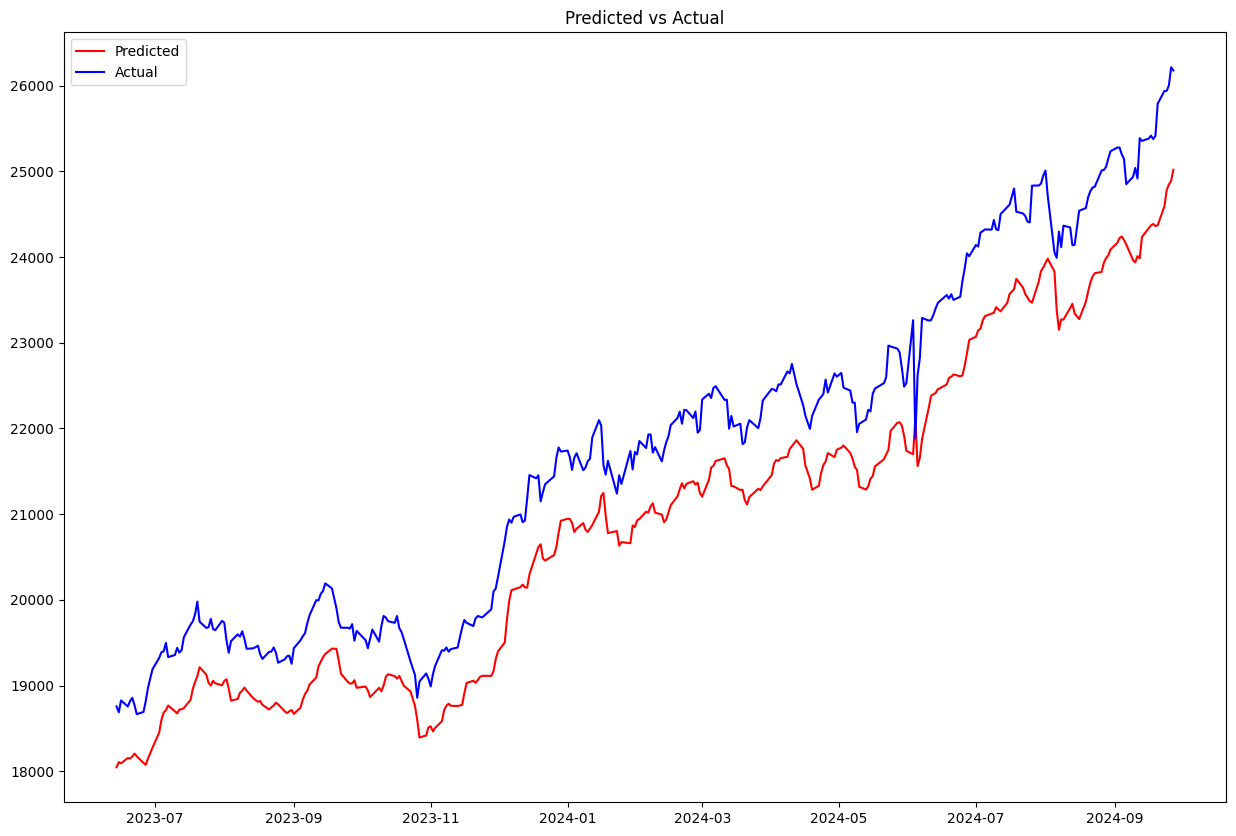

In [89]:
fig, ax = plt.subplots(figsize=(15, 10))  # Set figsize here
ax.plot(pred_vs_actual['Predicted'], label='Predicted', color='r')
ax.plot(pred_vs_actual['Actual'], label='Actual', color='b')
ax.set_title('Predicted vs Actual')
ax.legend()  # Add legend to show labels
plt.show()  # To display the plot

In [90]:
plot_data = pd.concat([adj_close[:split_index+100],pred_vs_actual], axis=0)

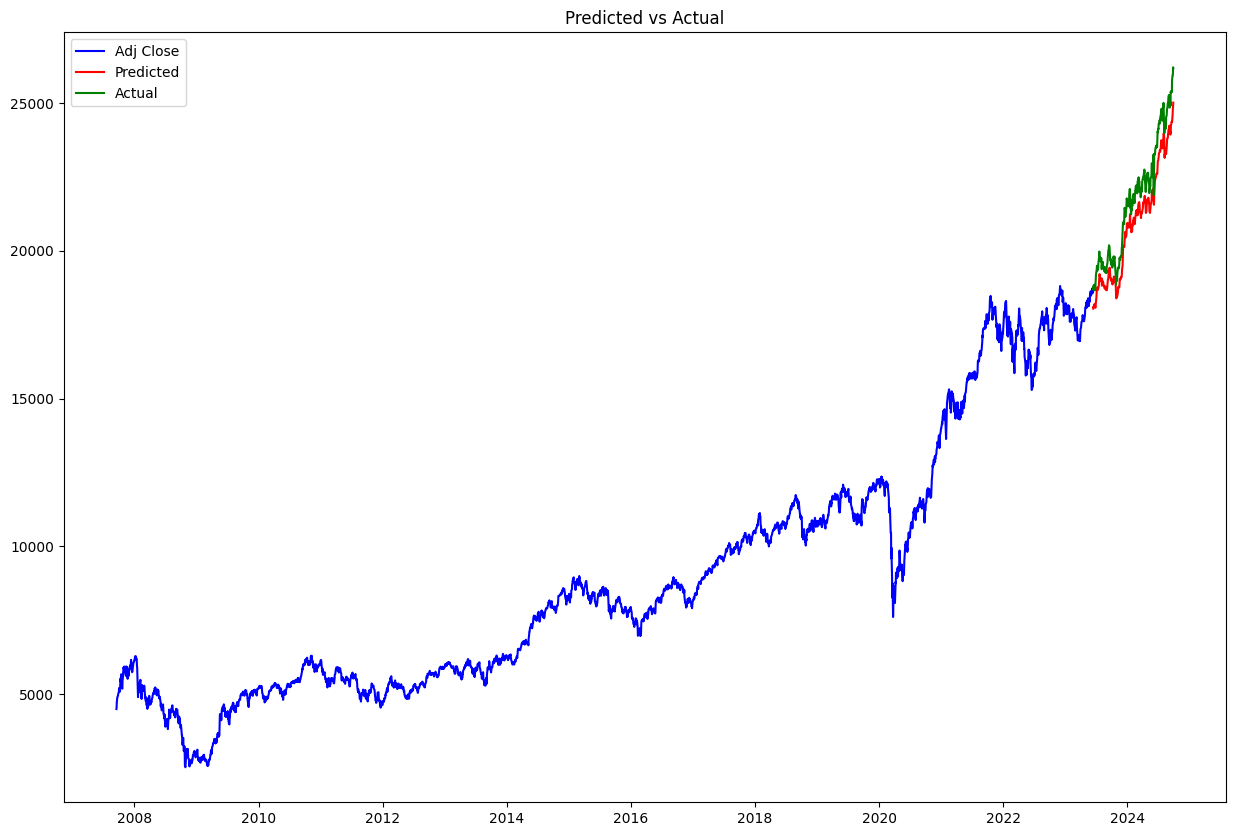

In [91]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(plot_data['Adj Close'],label='Adj Close',color='b')
ax.plot(plot_data['Predicted'],label='Predicted',color='r')
ax.plot(plot_data['Actual'],label='Actual',color='g')
ax.set_title('Predicted vs Actual')
ax.legend()

# Predicting adj close for tomorrow

In [92]:
last_100_days = scaled_data[-100:].reshape(1,100,1)
x = model.predict(last_100_days)
x = scaler.inverse_transform(x)
x

1/1 [==============================] - 0s 35ms/step


array([[25054.355]], dtype=float32)

In [93]:
model.save("model.keras")

In [96]:
# r2 metric
from sklearn.metrics import r2_score
r2_score(pred,y_test)

0.8003502703213572